<a href="https://colab.research.google.com/github/Rushikesh-Badgujar/Data_Science/blob/main/Elbow_method_for_finding_K_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

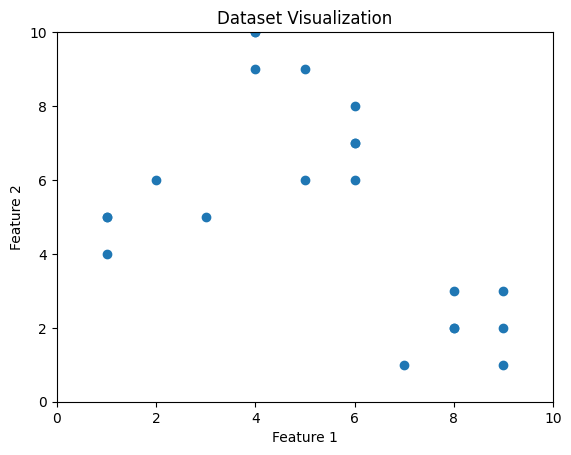

In [2]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6,
               7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7,
               1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

plt.scatter(x1, x2, marker='o')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [3]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])

    inertias.append(kmeanModel.inertia_)

    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Distortion values:
1 : 14.90249433106576
2 : 5.146258503401359
3 : 1.8817838246409675
4 : 0.856122448979592
5 : 0.7166666666666667
6 : 0.5484126984126984
7 : 0.4325396825396825
8 : 0.3817460317460318
9 : 0.3341269841269841


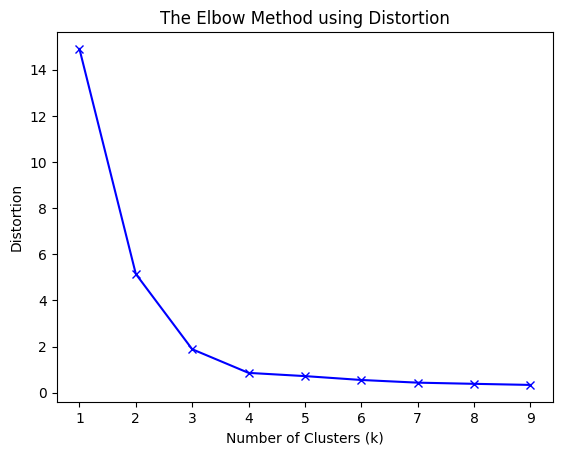

In [4]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Inertia values:
1 : 312.95238095238096
2 : 108.07142857142854
3 : 39.51746031746032
4 : 17.978571428571428
5 : 15.049999999999997
6 : 11.516666666666666
7 : 9.083333333333334
8 : 8.016666666666667
9 : 7.0166666666666675


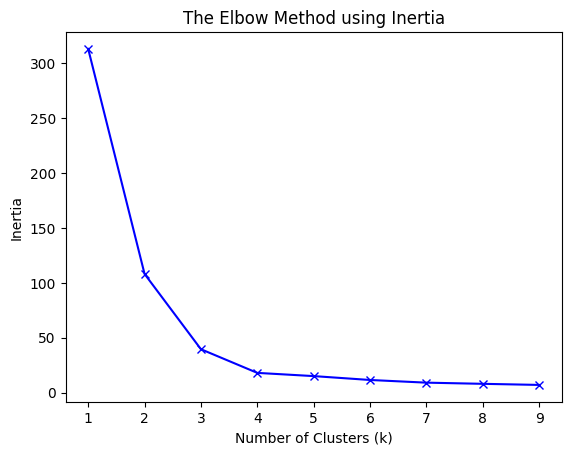

In [5]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

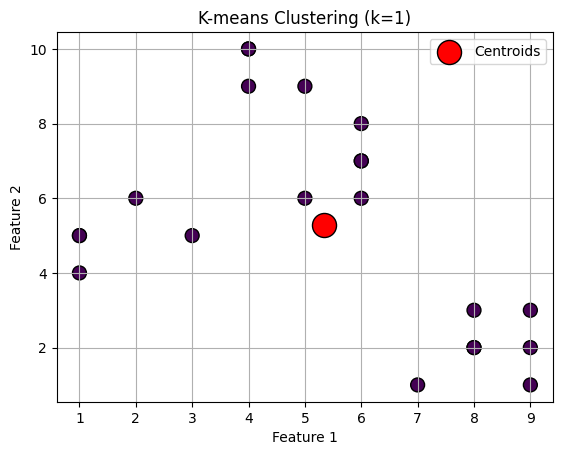

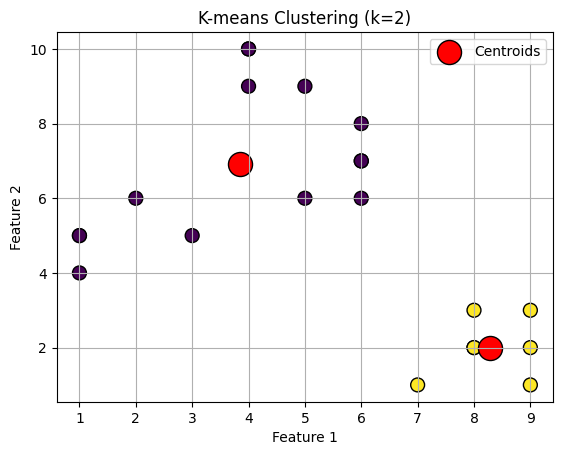

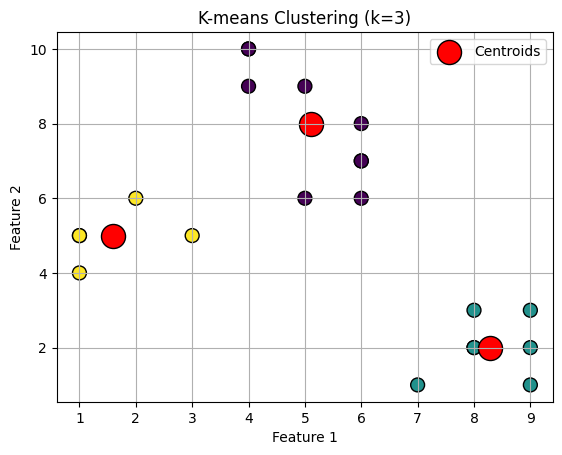

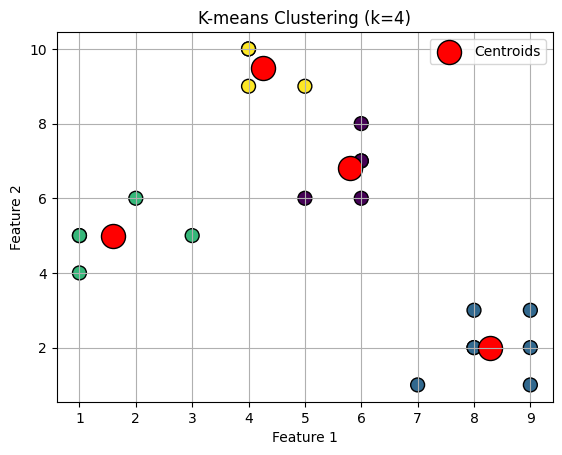

In [6]:
k_range = range(1, 5)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()